<!-- Badges: -->

<!-- Title: -->
<div align="center">
  <h1><b> Circuit Identities </b></h1>
  <h2> Crash Course - Quantum Circuit Theory </h2>
</div>
<br>

<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

<div align='center'>
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/quantum-circuit-theory"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>
</div>

In [1]:
%run 11_implementations.ipynb

Author: Lucas Camponogara Viera

Github username: camponogaraviera

Website: https://qucai-lab.github.io/

Last updated: 2023-06-08

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.14.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.19.0-43-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git repo: https://github.com/QuCAI-Lab/quantum-circuit-theory.git

Git branch: dev

numpy     : 1.23.5
pylatexenc: 2.10
IPython   : 8.14.0
matplotlib: 3.6.2
sympy     : 1.11.1
pennylane : 0.28.0
watermark : 2.3.1
scipy     : 1.9.3

Watermark: 2.3.1

{'commit_hash': 'f11276427',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/home/lucas/anaconda3/envs/qct/lib/python3.11/site-packages/IPython',
 'ipython_version': '8.14.0',
 'os_name': 'posix',
 'platform': 'Linux-5.19.0-43-generic-x86_64-with-glibc2.35',
 'sys_executable': '/home/lucas/anaconda3/envs/qct/bin/python',
 'sys_platf

# Qiskit little-endian convention

In little-endian convention, higher qubit indices are more significant, i.e, the last qubit (highest register index) is stored first. In qiskit, one reads a circuit in a bottom-up approach, in the sense that a statevector $|abc\rangle$ has quantum registers 0, 1, 2 in states $|c\rangle$, $|b\rangle$, $|a\rangle$, respectively. Example: the state $|100\rangle$, in qiskit, corresponds to a quantum circuit with the first qubit in state $|0\rangle$, the middle qubit in state $|0\rangle$, and the last qubit in state $|1\rangle$.

## Circuit example 1

Consider the following circuit:

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2)) 



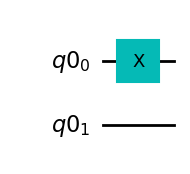

In [2]:
backend = Aer.get_backend('unitary_simulator')
dec = 2                                # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit')
qc.x(0)                                # Apply the Pauli-X gate on qubit 0.
print(Statevector.from_instruction(qc), '\n')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, dec)
qc.draw(output='mpl')

In [3]:
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

In little-endian convention, the circuit above has the following unitary operator:

$$\hat{U} = \mathbb{I} \otimes X.$$

Such that 

$$\hat{U} |00\rangle = (\mathbb{I} \otimes X) (|0\rangle \otimes |0\rangle)=\mathbb{I}|0\rangle \otimes  X |0\rangle=|0\rangle \otimes |1\rangle =|01\rangle = [0,1,0,0].$$

In [4]:
# Operator I⊗X:
np.kron(sigma0, sigma1)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [5]:
np.kron(sigma0, sigma1)@np.kron(zero,zero).T #(I⊗X)|00>=|01>.

array([[0.],
       [1.],
       [0.],
       [0.]])

In [6]:
np.kron(zero,one).T #|01>.

array([[0],
       [1],
       [0],
       [0]])

## Circuit example 2

Consider the following circuit:

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2)) 



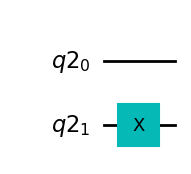

In [7]:
backend = Aer.get_backend('unitary_simulator')
dec = 2                                # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit')
qc.x(1)                                # Apply the Pauli-X gate on qubit 1.
print(Statevector.from_instruction(qc), '\n')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, dec)
qc.draw(output='mpl')

In [8]:
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

In little-endian convention, the circuit above has the following unitary operator:

$$\hat{U} = X \otimes \mathbb{I} .$$

Such that 

$$\hat{U} |00\rangle = ( X \otimes \mathbb{I}) (|0\rangle \otimes |0\rangle)= X|0\rangle \otimes  \mathbb{I} |0\rangle=|1\rangle \otimes |0\rangle =|10\rangle = [0,0,1,0].$$

In [9]:
# Operator X⊗I:
np.kron(sigma1, sigma0) 

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

np.kron(sigma1, sigma0)@np.kron(zero,zero).T #(X⊗I)|00>=|10>.

In [10]:
np.kron(one,zero).T #|10>.

array([[0],
       [0],
       [1],
       [0]])

# Circuits identities via conjugation by unitary

Recall that a tensor product of unitary matrices yields another unitary matrix. See the [0_algebraic_identities.ipynb](#) notebook for the proof.

## $(H\otimes H) CNOT_{(0,1)}(H\otimes H) = CNOT_{(1,0)}$ 

[Phase kickback](https://learn.qiskit.org/course/ch-gates/phase-kickback).

Recall the mixed product property $(A\otimes B)(C\otimes D) = AC\otimes BD$.

\begin{align}
(H\otimes H) \Big(\mathbb{I} \otimes |0\rangle\langle 0| + X \otimes |1 \rangle \langle 1|\Big) (H\otimes H)
&= (H\otimes H) \Big(\mathbb{I} \otimes |0\rangle\langle 0| \Big) (H\otimes H)  + (H\otimes H) \Big(X \otimes |1 \rangle \langle 1|\Big) (H\otimes H) \\
&= \Big(H\mathbb{I} \otimes H|0\rangle\langle 0| \Big) (H\otimes H)  + \Big(HX \otimes H|1 \rangle \langle 1|\Big) (H\otimes H)\\
&= \Big(H\mathbb{I}H \otimes H|0\rangle\langle 0|H \Big) + \Big(HXH \otimes H|1 \rangle \langle 1|H\Big)\\
&= \Big(\mathbb{I} \otimes H|0\rangle\langle 0|H \Big) + \Big(Z \otimes H|1 \rangle \langle 1|H\Big).
\end{align}

Computing the matrix products one can verify it is identical to the $CNOT_{10}$ gate:

$$CX^{q_1q_0}=|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X.$$

- **Verifying with NumPy:**

In [12]:
# Left hand side:

(np.kron(had,had)@cnot_01@np.kron(had,had)).round().astype("uint8")

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], dtype=uint8)

In [13]:
# Right hand side:

(np.kron(sigma0,had@outzero@had) + np.kron(sigma3,had@outone@had)).round().astype("uint8")

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], dtype=uint8)

In [14]:
# CNOT_10: 

np.kron(outzero,sigma0)+np.kron(outone,sigma1)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [15]:
# HXH = Z.

((had@sigma1@had).round() == sigma3).all() 

True

- **Verifying with Qiskit:**

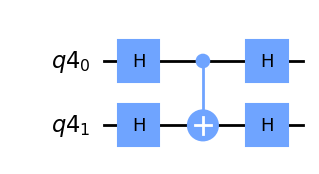

In [13]:
# Left hand side:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.h(0),qc.h(1), qc.cnot(0,1), qc.h(0),qc.h(1)
qc.draw(output='mpl')

In [14]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, 2)
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

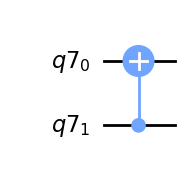

In [15]:
# Right hand side:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.cnot(1,0)
qc.draw(output='mpl')  

In [16]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, 2)
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

## $CZ(X \otimes I)CZ^{\dagger} = X \otimes Z$

## $CNOT_{(j,k)}(X\otimes I_2) CNOT_{(j,k)} = X \otimes X$ 


## $(I_2 \otimes S)e^{i\frac{\theta}{2} (X\otimes X)}(I_2 \otimes S^{\dagger})=e^{i\frac{\theta}{2} (X\otimes Y)}$ 

## $CNOT_{(j,k)} (R_{\hat{n}}(\theta)\otimes I_2)CNOT_{(j,k)}=e^{i\frac{\theta}{2}((\vec{\sigma} \cdot \hat{n})\otimes (\vec{\sigma}\cdot \hat{n}))}$

## $SWAP = ...$

In [this video](https://www.youtube.com/watch?v=-5Ds6n7fmKc), Alonso-Linaje shows how to verify that a SWAP gate can be given in terms of 2-qubit unitaries.

In practice, a SWAP gate is rather implemented with only three CNOT gates (see [3_two_qubit_gates.ipynb](3_two_qubit_gates.ipynb)). For one, because the circuit will have a lower [circuit depth](https://qiskit.org/documentation/_images/depth.gif) and thus will be less prone to errors. On the other hand, because the CNOT gate is a native gate in several quantum hardware architectures.

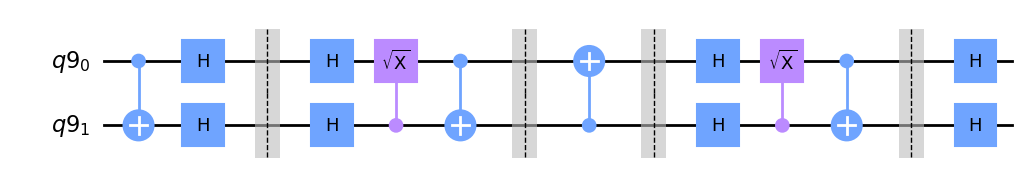

In [17]:
qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.cnot(0,1)
qc.h(0)
qc.h(1)

qc.barrier()  
qc.h(0)
qc.h(1)
qc.csx(1,0)
qc.cnot(0,1)
qc.barrier() 

qc.cnot(1,0)

qc.barrier()  
qc.h(0)
qc.h(1)
qc.csx(1,0)
qc.cnot(0,1)
qc.barrier()  

qc.h(0)
qc.h(1)
qc.draw(output='mpl')  

In [18]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, 2)
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

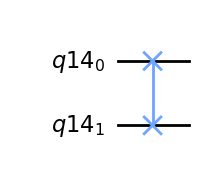

In [19]:
# SWAP gate:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.swap(1,0)
qc.draw(output='mpl')  

In [20]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, 2)
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

# References &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> 


\[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 
- Chapter 4.

\[2] Barenco, A., Bennett, C.H., Cleve, R., DiVincenzo, D.P., Margolus, N., Shor, P., Sleator, T., Smolin, J.A. and Weinfurter, H. (1995) Elementary gates for quantum computation. [Phys. Rev. A 52, 3457–3467](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457).
